# Problem Statement

We will perform the Sports Analytics and Visualisation of NFL 2018 Dataset which can be found from www.dataworld.com, using python programming.

Our Analysis will divided into 2 Categories.

1) Analyzing NFL Games
   - Perform visualization of frequency of games played with respect to Date.
   - Perform visualization of frequency of games played with respect to Time of each Date.
   - Perform visualization of frequency of games played with respect to week.
   - Perform visualization of frequency of games played with respect to day.
    
2) Knowing the NFL Players
   - Perform visualization of numbers of players played with respect to their Age.
   - Perform visualization of numbers of players played with respect to their Positons on the Playground.
   - Perform visualization of numbers of players played with respect to their Positons at CB (Cornerback) and WR (Wide  Receiver) positions of the Playground.
   - Perform visualization of Height vs. Weight of all the Players Played.

For the analysis with respect to both categories we have different datasets. The describtion of the data are mentioned below under individual categorial analysis.

# 1) Analyzing NFL Games 

The first dataset that we will be looking at in this course is the dataset containing information about the NFL games. Such kind of datasets are very helpful in giving us an idea about how a sport's season was/will be played out.

- gameId: Game identifier, unique (numeric)

- gameDate: Game Date (time, mm/dd/yyyy)

- gameTimeEastern: Start time of game (time, HH:MM:SS, EST)

- homeTeamAbbr: Home team three-letter code (text)

- visitorTeamAbbr: Visiting team three-letter code (text)

- week: Week of game (numeric)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

# Import Dataset

In [50]:
games_df= pd.read_csv('C:/Users/Rohit/Desktop/Sports Analytics and Visualisation/games.csv')

In [51]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [52]:
games_df.describe()

,gameId,week
count,2.530000e+02,253.000000
mean,2.018108e+09,9.122530
std,1.144901e+04,4.979801
min,2.018091e+09,1.000000
25%,2.018101e+09,5.000000
50%,2.018110e+09,9.000000
75%,2.018121e+09,14.000000
max,2.018123e+09,17.000000


In [53]:
games_df.shape

(253, 6)

In [54]:
games_df.head(5)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


# Dataset Analysis

Convert the date and time columns to Pandas datetime values. This will help to standarize such data across the multiple datasets and to use ready-made functions.

In [55]:
# Converting to datetime.date values
games_df['gameDate'] = pd.to_datetime(games_df['gameDate']).dt.date

# Converting to datetime.time values
games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern']).dt.time

games_df.head(5)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


Now, let's understand how the games are distributed in accordance to the date, time, day and the week.

Analysis  the distribution of games in relation to the game dates.

In [56]:
# Checking the frequency of games in relation to gamedates as a column
games_df['gameDate'].value_counts().reset_index()

,index,gameDate
0,2018-12-30,16
1,2018-12-09,14
2,2018-09-23,14
3,2018-12-02,14
4,2018-09-16,14
5,2018-09-30,13
6,2018-12-23,13
7,2018-10-07,13
8,2018-10-14,13
9,2018-10-28,12


There were a total of 50 different game dates in the dataset.

In [57]:
# Renaming the columns
date_dist = games_df['gameDate'].value_counts().reset_index()
date_dist.columns = ['date', 'frequency']

date_dist.head()

,date,frequency
0,2018-12-30,16
1,2018-12-09,14
2,2018-09-23,14
3,2018-12-02,14
4,2018-09-16,14


In [58]:
# Sorting the data based on the date and setting the index as the date.
sorted_date_dist = date_dist.sort_values('date').set_index('date')

sorted_date_dist.head()

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14


<AxesSubplot:xlabel='date'>

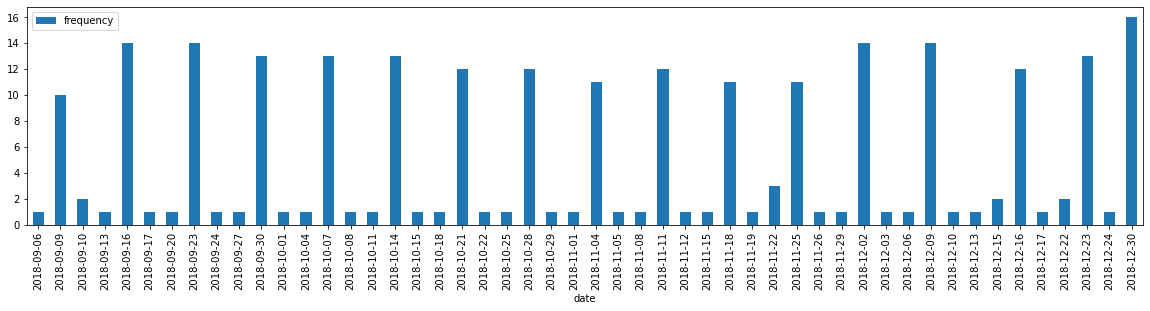

In [59]:
sorted_date_dist.plot(kind='bar',  figsize=(20,4))

- As per above graph, 30 Dec,2018 has highest numbers of games played. 
- Single game per day are maximum in entire date range.
- After Every 2 consecutive Single game per day the next game dates are having high frequency of game palyed.

We can perform the above analysis with gametimeeastern and its frequencies.

In [60]:
# Checking the frequency of games in relation to gametimeeastern as a column
games_df['gameTimeEastern'].value_counts().reset_index()

,index,gameTimeEastern
0,13:00:00,136
1,16:25:00,38
2,20:20:00,34
3,16:05:00,22
4,20:15:00,15
5,16:30:00,3
6,09:30:00,2
7,12:30:00,1
8,19:10:00,1
9,22:20:00,1


In [61]:
# Renaming the columns
time_dist = games_df['gameTimeEastern'].value_counts().reset_index()
time_dist.columns = ['easterngametime', 'frequency']

time_dist.head()

,easterngametime,frequency
0,13:00:00,136
1,16:25:00,38
2,20:20:00,34
3,16:05:00,22
4,20:15:00,15


In [62]:
# Sorting the data based on the gametime and setting the index as the gametime.
sorted_time_dist = time_dist.sort_values('easterngametime').set_index('easterngametime')

sorted_time_dist.head()

,frequency
easterngametime,
09:30:00,2
12:30:00,1
13:00:00,136
16:05:00,22
16:25:00,38


<AxesSubplot:xlabel='easterngametime'>

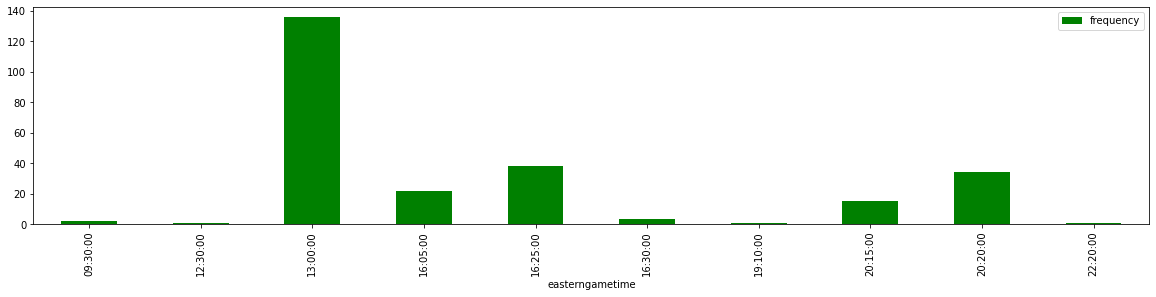

In [63]:
sorted_time_dist.plot(kind='bar', color='g', figsize=(20,4))

- As per above graph, the time range in Morning first half, Evening and Late night were least likely for game played . 
- Afternoon at 13.00 hours was the most likey time for game played.
- Evening time @ 16.25 hours and 20.15 hours were moderate time for game played.

We can perform the above analysis with week and its frequencies.

In [64]:
# Checking the frequency of games in relation to week as a column
games_df['week'].value_counts().reset_index()

,index,week
0,17,16
1,3,16
2,15,16
3,14,16
4,13,16
5,2,16
6,16,16
7,12,15
8,6,15
9,5,15


In [65]:
# Renaming the columns
week_dist = games_df['week'].value_counts().reset_index()
week_dist.columns = ['week', 'frequency']

week_dist.head()

,week,frequency
0,17,16
1,3,16
2,15,16
3,14,16
4,13,16


In [66]:
# Sorting the data based on the week and setting the index as the week.
sorted_week_dist = week_dist.sort_values('week').set_index('week')

sorted_week_dist.head()

,frequency
week,
1,13
2,16
3,16
4,15
5,15


<AxesSubplot:xlabel='week'>

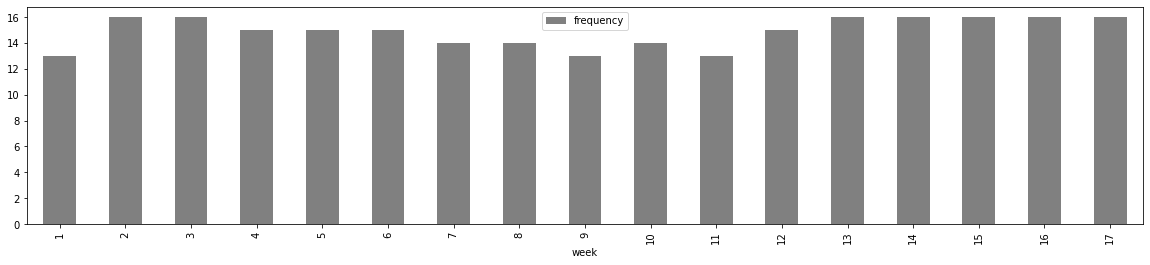

In [67]:
sorted_week_dist.plot(kind='bar', color='grey', figsize=(20,4))

- As per above graph, week 1,9, & 11 were least likely for game played . 
- week 2-3 and week 13-17 most likey weeks for highest numbers of game played.

We can perform the above analysis with day and its frequencies. Before that , we need to extact day in string data type from gamedate coloumn by using lamba function.

In [68]:
# Creating a column containing the day of the week information extracted from the date
games_df['gameday'] = games_df['gameDate'].apply(lambda x: x.strftime('%A'))

games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameday
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


In [69]:
games_df['gameday'].value_counts().reset_index()

,index,gameday
0,Sunday,215
1,Monday,17
2,Thursday,17
3,Saturday,4


In [70]:
gameday_dist = games_df['gameday'].value_counts().reset_index()
gameday_dist.head()

,index,gameday
0,Sunday,215
1,Monday,17
2,Thursday,17
3,Saturday,4


In [71]:
gameday_dist.columns = ['gameday', 'frequency']
gameday_dist.head()

,gameday,frequency
0,Sunday,215
1,Monday,17
2,Thursday,17
3,Saturday,4


In [72]:
sorted_gameday_dist = gameday_dist.sort_values('gameday').set_index('gameday')
sorted_gameday_dist.head()

,frequency
gameday,
Monday,17
Saturday,4
Sunday,215
Thursday,17


<AxesSubplot:xlabel='gameday'>

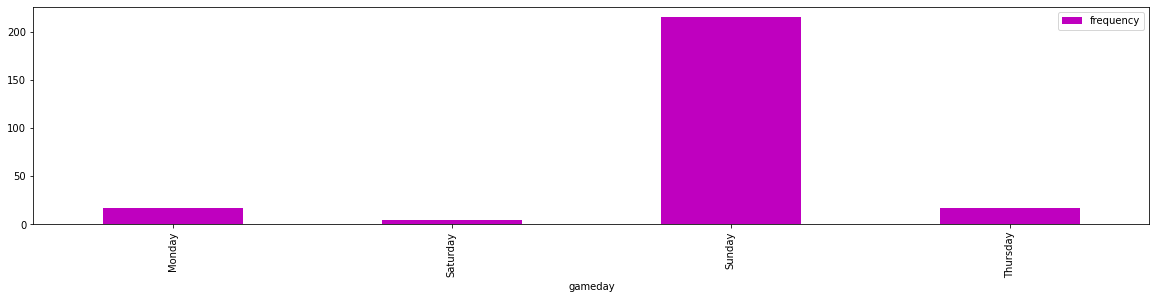

In [73]:
sorted_gameday_dist.plot(kind='bar', color='m', figsize=(20,4))

- As per above graph, Sunday has highest numbers for game played and Sturday has the lowest numbers for game played. 
- Monday and Thursday has moderate numbers of game played.

# 2) Knowing the NFL Players

The second dataset  contains infromation about the NFL players. the datasets gives information abount physical attributes of a player and the distribution of player statistics amongst different team positions.

This dataset contains the following information:

- nflId: Player identification number, unique across players (numeric)

- height: Player height (text)

- weight: Player weight (numeric)

- birthDate: Date of birth (YYYY-MM-DD)

- collegeName: Player college (text)

- position: Player position (text)

- displayName: Player name (text)

# Import Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

# Import Dataset

In [75]:
players_df = pd.read_csv('C:/Users/Rohit/Desktop/Sports Analytics and Visualisation/players.csv')

In [76]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [77]:
players_df.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


In [78]:
players_df.shape

(1303, 7)

In [79]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


# Dataset Analysis

Convert the date and time columns to Pandas datetime values. This will help to standarize such data across the multiple datasets and to use ready-made functions.

In [80]:
# Converting to datetime.date values
players_df['birthDate'] = pd.to_datetime(players_df['birthDate']).dt.date

# Extracting the year
players_df['birthYear'] = pd.to_datetime(players_df['birthDate']).dt.year

players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


find the age distribution of the NFL players. For this, we will have to find the age of the players in respect to the year 2018.

In [81]:
# Finding the age of the players
players_df['age'] = 2018 - players_df['birthYear']

players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


In [82]:
age_dist= players_df['age'].value_counts().reset_index()
age_dist.head()

,index,age
0,24,184
1,23,176
2,25,174
3,26,149
4,27,115


In [83]:
age_dist.columns = ['age', 'frequency']
age_dist.head()

,age,frequency
0,24,184
1,23,176
2,25,174
3,26,149
4,27,115


In [84]:
sorted_age_dist = age_dist.sort_values('age').set_index('age')
sorted_age_dist

,frequency
age,
20,1
21,24
22,100
23,176
24,184
25,174
26,149
27,115
28,108


<AxesSubplot:xlabel='age'>

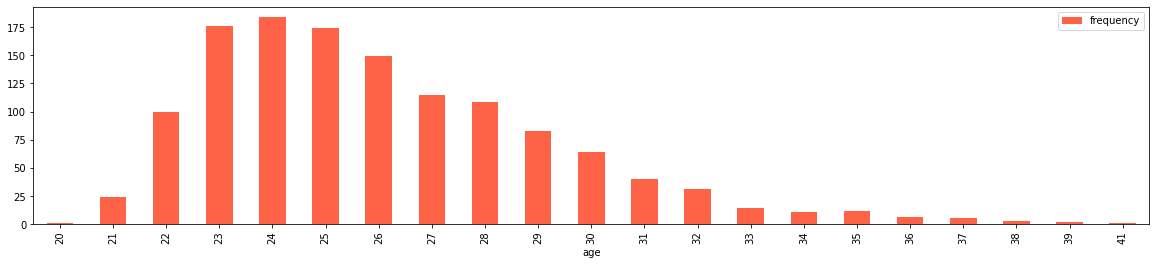

In [85]:
sorted_age_dist.plot(kind='bar', color='tomato', figsize=(20,4))

- The above graph is having positive skewness.
- The most of the players are in age between 23-25.
- The population of players drecreases from the age of 26 until age 41.

Let's see how the players are distributed amongst different team positions.

In [86]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


![](player_positions.png)

In [87]:
#Count Positions in terms of frequencies
position_dist= players_df['position'].value_counts().reset_index()
position_dist.head()

,index,position
0,WR,228
1,CB,195
2,RB,135
3,TE,128
4,OLB,100


In [88]:
#Column renaming.
position_dist.columns = ['position', 'frequency']

#Sorting the Postions in a ascending-alphabetic order.
sorted_position_dist = position_dist.sort_values('position').set_index('position')

sorted_position_dist.head()

,frequency
position,
CB,195
DB,33
DE,49
DT,28
FB,19


<AxesSubplot:xlabel='position'>

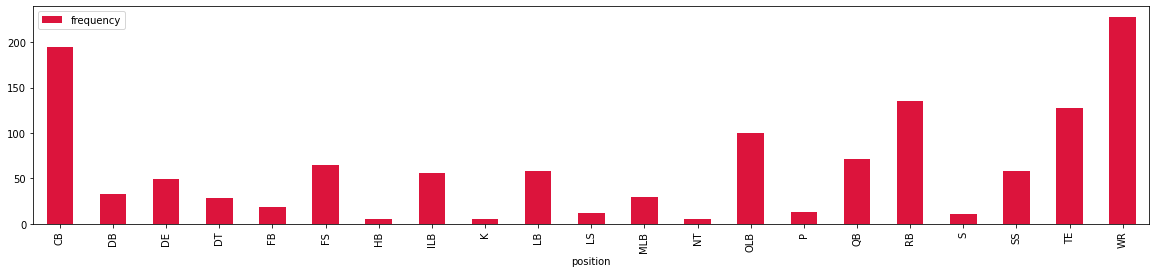

In [89]:
sorted_position_dist.plot(kind='bar', color='crimson', figsize=(20,4))

- As per above graph, CB and WR ppositions have highest numbers od players.
- HB, K, LS, NT, P and S positions are having very less players.

Let's find out the age distribution of players in the CB (Cornerback) and WR (Wide Receiver) positions.

In [90]:
# Selecting position = CB
players_cb_df= players_df.query('position == "CB"')
players_cb_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24


In [91]:
#Count age of players @ CB position in terms of frequencies
age_cb_dist= players_cb_df['age'].value_counts().reset_index()
age_cb_dist.head()

#Column renaming.
age_cb_dist.columns = ['age', 'frequency']

#Sorting the age in a ascending-alphabetic order.
sorted_age_cb_dist = age_cb_dist.sort_values('age').set_index('age')

sorted_age_cb_dist.head()

,frequency
age,
21,4
22,18
23,30
24,23
25,26


<AxesSubplot:xlabel='age'>

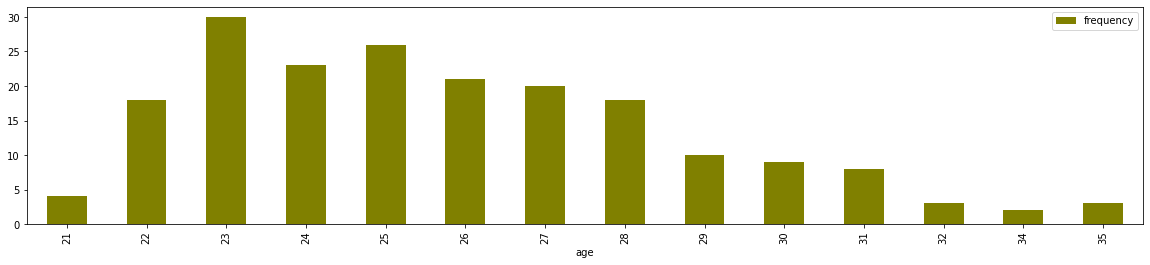

In [92]:
sorted_age_cb_dist.plot(kind='bar', color='olive', figsize=(20,4))

- The above graph is having positive skewness.
- The highest numbers of the players are @ age 23 and the least numbers of players are @ age 34.
- The population of players drecreases from the age of 25 until age 35.

In [93]:
# Selecting position = WR
players_wr_df= players_df.query('position == "WR"')
players_wr_df

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
11,2552600,72,198,1993-05-24,Southern California,WR,Nelson Agholor,1993,25
12,2553502,68,190,1993-04-10,Sacramento State,WR,DeAndre Carter,1993,25
20,2495454,75,220,1989-02-08,Alabama,WR,Julio Jones,1989,29
33,2552418,70,192,1991-12-18,East Carolina,WR,Justin Hardy,1991,27
...,...,...,...,...,...,...,...,...,...
1281,2556530,5-11,190,1993-08-30,Memphis,WR,Mose Frazier,1993,25
1286,2556672,6-4,218,1992-09-29,Toledo,WR,Alonzo Russell,1992,26
1294,2561359,72,180,1995-03-19,Texas Southern,WR,Darvin Kidsy,1995,23
1299,2556814,6-2,200,1994-05-17,Duke,WR,Max McCaffrey,1994,24


In [94]:
#Count age of players @ WR position in terms of frequencies
age_wr_dist= players_wr_df['age'].value_counts().reset_index()

#Column renaming.
age_wr_dist.columns = ['age', 'frequency']

#Sorting the age in a ascending-alphabetic order.
sorted_age_wr_dist = age_wr_dist.sort_values('age').set_index('age')

sorted_age_wr_dist.head()

,frequency
age,
21,5
22,21
23,31
24,34
25,35


<AxesSubplot:xlabel='age'>

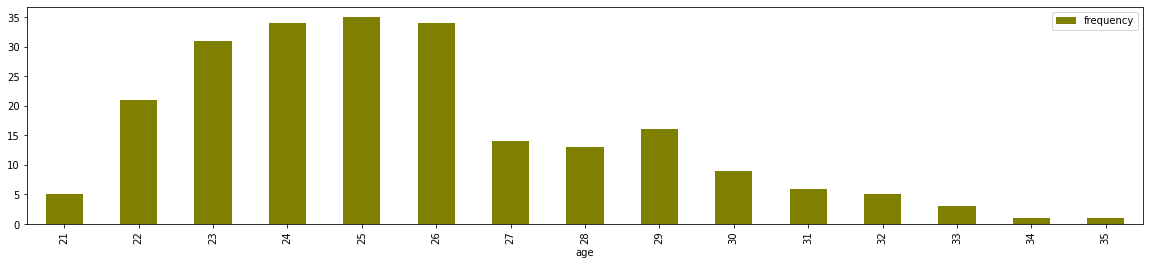

In [95]:
sorted_age_wr_dist.plot(kind='bar', color='olive', figsize=(20,4))

- The above graph is having positive skewness.
- The highest numbers of the players are @ age 25 and the least numbers of players are @ age 34.
- The population of players drecreases from the age of 26 until age 35.

 let's find the actual height and weight distribution of the players. 

In [96]:
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


We can see the above table, there are some inconsistencies in the height column. We can fix this using lamba function.

Fixing the inconsistency by converting all data to inches using lamba function.
- players_df['height'] = players_df['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

We can use joint plot to see the realtionship between height and weight of player.

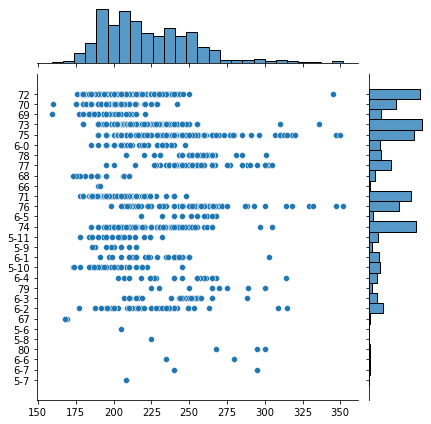

In [97]:
# Assigning the height and weight values
height = players_df['height'].values
weight = players_df['weight'].values

# Plotting a joint plot
sns.jointplot(x=weight, y=height)

- As per above graph, most of NFL players weight values are between 175 and 275.
- Most of NFL players height values are between 67.5 and 77.5